<a href="https://colab.research.google.com/github/SuryaSurya1998/5.-CRIME_COIMBATORE_EDA/blob/main/crime_coimbatore_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Coimbatore, also known as Kovai or sometimes spelt as Covai, is a city in the Indian state of Tamil Nadu. It is located on the banks of the Noyyal River and surrounded by the Western Ghats. Coimbatore is the second largest city in Tamil Nadu after Chennai and the 16th largest urban agglomeration in India. It is administered by the Coimbatore Municipal Corporation and is the administrative capital of Coimbatore district.this project analyzes 4 years of crime reports from across all of San Francisco's neighborhoods to create a model that predicts the category of crime that occurred, given time and location.

# **Definition**

## **Project Overview**

Crime is characteristic of society. Studies in criminology and penology relate crime to the inherent nature of the human psyche. However, it is imperative to punish those who commit heinous crimes in modern society, for they infringe upon another’s rights and, hence, stray away from their own duties. The prevention of crimes is imperative to the protection of the rights of every individual- the fundamental basis of modern democracy.

It is essential to study the cause and effect of the force one is trying to prevent. While the effects of crime range from a mere injury to the infringement of a legal right to the loss of life, the causes may be varied and multi-layered. A multi-faceted approach to crime is explored herewith, broadly at first and then with specific application to domestic violence as a crime.


We will explore a dataset of nearly 4 years of crime reports from across all of Coimbatore's neighborhoods, and we will create a model that predicts the category of crime that occurred, given the time and location.

# **Problem Statement**

To examine the specific problem, we will apply a full Data Science life cycle composed of the following steps:


1.   Data Wrangling to audit the quality of the data and perform all the necessary actions to clean the dataset.

2.   Data Exploration for understanding the variables and create intuition on the data.

1.   Feature Engineering to create additional variables from the existing.
Data Normalization and Data Transformation for preparing the dataset for the learning algorithms (if needed).
2.   Training / Testing data creation to evaluate the performance of our models and fine-tune their hyperparameters.

1.   Model selection and evaluation. This will be the final goal; creating a model that predicts the probability of each type of crime based on the location and the date












In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab

In [ ]:
df=pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/crime_coimbatore.xls')

In [ ]:
df.shape

(3013, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Station_id                3013 non-null   object        
 1   Station_code              3013 non-null   int64         
 2   Station_place             3013 non-null   object        
 3   Type_of_crime             3013 non-null   object        
 4   Charges                   3013 non-null   object        
 5   Month_year                3013 non-null   object        
 6   Date_of_crime             3013 non-null   datetime64[ns]
 7   Day_of_crime              3013 non-null   object        
 8   Time_of_crime             3013 non-null   object        
 9   Shifts                    3013 non-null   object        
 10  Reporting_date            3013 non-null   datetime64[ns]
 11  Reporting_time            369 non-null    object        
 12  Crime_place         

In [ ]:
df.head()

,s_bno,id_code,s_pl,ty,ty_c,m_y_c,dt_c,dy_c,tm_c,se_c,dt_cp,tm_cp,area_c,lon,lat,re_area,tmax7hr,tmin7hr,wind8ftkmp,rf_mm,pop,h_hold,area_sq_km
0,B1,7,Big Bazza,Murder,Land Disp,"Jan,06",01.22.06,Sunday,9.30 pm,Evening,01.23.06,1.00 am,LG Thotta,76.9596,10.9874,Perur,31.6,13.7,3.9,0.0,82984,17989,4.1
1,B1,7,Big Bazza,Auto,LML,"Mar,03",03.25.03,Tuesday,12.00 pm,Evening,03.26.03,1.40 am,Vasantha,76.9577,10.9883,Nil,34.5,18.0,6.4,0.0,75793,14502,4.1
2,B1,7,Big Bazza,HB Night,Cam,"Jul,04",07.11.04,Sunday,10.30 pm,Evening,07.12.04,2.30 am,Chetty St,76.9605,10.9880,Sundarapu,30.0,22.5,4.8,15.4,78190,15280,4.1
3,B1,7,Big Bazza,HB Night,Attempt,"May,06",05.07.06,Sunday,3.00 am,Morning,05.07.06,6.00 am,RG St,76.9561,10.9888,Nil,35.0,24.0,3.9,0.0,82984,17989,4.1
4,B1,7,Big Bazza,Auto,BS,"Feb,04",02.12.04,Thursday,4.00 am,Morning,02.13.04,6.00 am,LG Thotta,76.9596,10.9874,Nil,30.5,16.5,8.6,0.0,78190,15280,4.1


In [ ]:
df.columns=['Station_id','Station_code','Station_place','Type_of_crime','Charges','Month_year','Date_of_crime','Day_of_crime',
            'Time_of_crime','Shifts','Reporting_date','Reporting_time','Crime_place','Longitude','Latitude','suspect_place',
           'Max_temperature','Min_temperature','Wind_speed_m/h','Rf_mm','Population_under_station','H_hold','Area_sq_km']

In [ ]:
df.head()

More specifically it includes the following variables.


                     

*   Station_id: Unique ID for every police station under a jurisdiction
*   Station_code : Unique code for police staiton under a area
* Station_place : place upto which the station service need to cover                 
* Type_of_crime: category of crime there are many different kinds of crimes, criminal acts can generally be divided into four primary categories   (This is our target variable.)              
* Charges : criminal charge is a formal accusation made by a governmental authority asserting that somebody has committed a crime                       
* Month_year : Month and year on which crime occured                    
* Date_of_crime : Date on which crime occured                 
* Day_of_crime  : Date on which crime occured                 
* Time_of_crime : timestamp of the crime incident              
* Shifts : Shift work can include evening, night, and early morning shifts, as well as fixed or rotating schedules                        
* Reporting_date : Date on which crime has reported                
* Reporting_time : timestamp of the crime  reported          
* Crime_place  : place at which crime happened                  
* Longitude  :     Longitude               
* Latitude   :    Latitude                
* suspect_place : Suspect residing place                 
* Max_temperature : wheater condition of place              
* Min_temperature : wheater condition of place               
* Wind_speed_m/h : wheater condition of place                
* Rf_mm    : wheater condition of place                      
* Population_under_station   : population under the police station    
* H_hold :                         
* Area_sq_km: Area of: Area under which particular police station is responsible of crime happening over that area



In [ ]:
df.isna().sum()

Station_id                     0
Station_code                   0
Station_place                  0
Type_of_crime                  0
Charges                        0
Month_year                     0
Date_of_crime                  0
Day_of_crime                   0
Time_of_crime                  0
Shifts                         0
Reporting_date                 0
Reporting_time              2644
Crime_place                    0
Longitude                      0
Latitude                       0
suspect_place                  0
Max_temperature                0
Min_temperature                0
Wind_speed_m/h                 0
Rf_mm                          0
Population_under_station       0
H_hold                         0
Area_sq_km                     0
dtype: int64

# **Dropping**

In [ ]:
df.drop(['Reporting_time'], axis=1)

df.replace('Nil','Unknown',inplace=True)

## Dates & Day of the week

Assigning correct datatype for date and time variable

In [ ]:
#df['Month_year']= pd.to_datetime(df.Month_year)
df['Date_of_crime']=pd.to_datetime(df['Date_of_crime'])
df['Date_of_crime'] = df['Date_of_crime'].dt.strftime('%d-%m-%Y')
df['Date_of_crime']=df['Date_of_crime'].astype('datetime64[s]')


df['Reporting_date']=pd.to_datetime(df['Date_of_crime'])
df['Reporting_date'] = df['Reporting_date'].dt.strftime('%d-%m-%Y')
df['Reporting_date']=df['Reporting_date'].astype('datetime64')
#df['Time_of_crime']=pd.to_datetime(df.Time_of_crime)

In [ ]:
from datetime import datetime
dat= list(df['Time_of_crime'])
time = []
time_form1 = []
for i in dat:
  #print(i)
  standard_time_format = datetime.strptime(i, "%I.%M %p")
  #std= standard_time_format.copy()
  #form = datetime.strftime(standard_time_format, "%H:%M:%S")
  #time.append(form)
  time_form = standard_time_format.time()
  time_form1.append(time_form)
  

In [ ]:
df['Time_of_crime'] = time_form1

In [ ]:
df['datetime'] = pd.to_datetime(df['Date_of_crime'].dt.strftime('%Y-%m-%d') + df['Time_of_crime'].astype(str), format = '%Y-%m-%d%H:%M:%S')
type (df['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

# **Exploratory Data Analysis**

### **Type_of_crime**
There are 10 discrete categories that the police department file the incidents with the most common being Automobile theft (38.01%), Pocket pick (24.84%), and House bug night(17.29%).

In [ ]:
crime = df['Type_of_crime'].unique()

print(crime)

['Murder' 'Auto' 'HB Night' 'Robbery' 'Snatch' 'P Pick' 'Grave The'
 'HB Day' 'M Gain' 'Dacoity']


Coimbatore Crimes

Category		Number of occurences
Auto         1143
P Pick        741
HB Night      520
Snatch        246
HB Day        102
Robbery        97
Grave The      80
Murder         65
M Gain         11
Dacoity         8
Name: Type_of_crime, dtype: int64


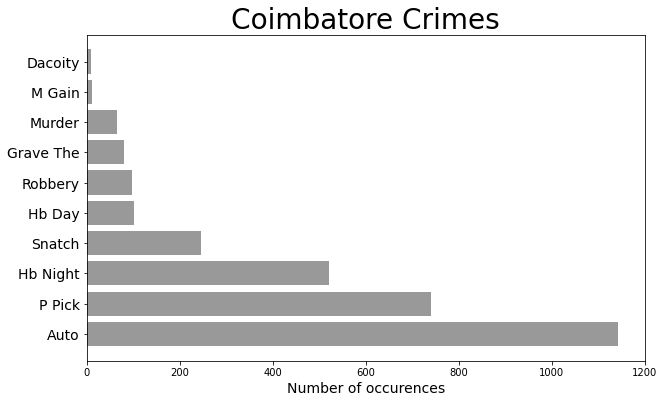

In [ ]:
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

crimes_rating = df['Type_of_crime'].value_counts()
y_pos = np.arange(len(crimes_rating[0:10].keys()))

plt.barh(y_pos, crimes_rating[0:10],  align='center', alpha=0.4, color = 'black')

plt.yticks(y_pos, map(lambda x:x.title(),crimes_rating[0:10].keys()), fontsize = 14)
plt.xlabel('Number of occurences', fontsize = 14)
plt.title('Coimbatore Crimes', fontsize = 28)
plt.ticklabel_format(style='sci', axis='x')

print ('Coimbatore Crimes\n')
print ('Category\t\tNumber of occurences') 
print (crimes_rating)


1


### **Datetime**

Splitting datetime to components 

In [ ]:
df['Year'].unique()

array([2006, 2003, 2004, 2005])

In [ ]:
df['DayOfWeek'] = df['datetime'].dt.dayofweek
df['Hour1'] = df['datetime'].dt.hour
df['Month'] = df['datetime'].dt.month
df['DayOfMonth'] = df['datetime'].dt.day
df['Year'] = df['datetime'].dt.year

In [ ]:
# for plotting

Murder = df[df['Type_of_crime'] == "Murder"]
Automobile = df[df['Type_of_crime'] == "Auto"]
Pocket_Pick = df[df['Type_of_crime'] == "P Pick"]
house_bug_night = df[df['Type_of_crime'] == "HB Night"]
house_bug_day = df[df['Type_of_crime'] == "HB Day"]
Snatch = df[df['Type_of_crime'] == "Snatch"]
Robbery = df[df['Type_of_crime'] == "Robbery"]
grave = df[df['Type_of_crime'] == "Grave The"]
murder_gain = df[df['Type_of_crime'] == "M Gain"]
Dacoity = df[df['Type_of_crime'] == "Dacoity"]

In [ ]:
df['Hour1'].unique()


array([21, 12, 22,  3,  4,  5,  6, 19, 11,  2,  7, 20,  0, 18, 17,  1,  8,
        9, 16, 10, 15, 23, 13, 14])

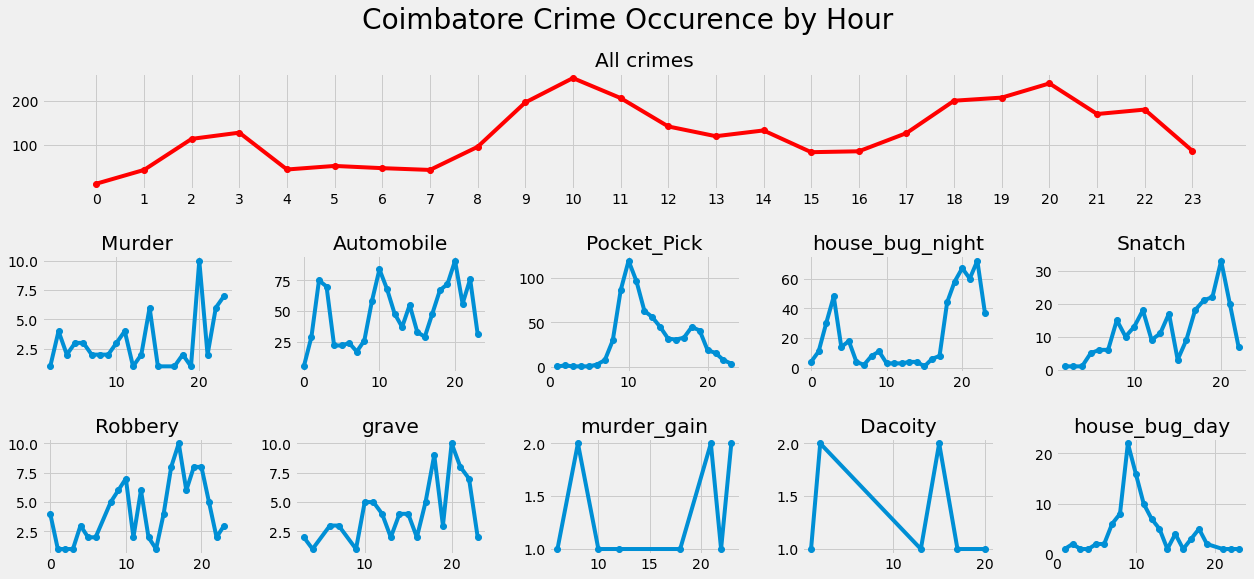

In [ ]:
from matplotlib.pyplot import *

pylab.rcParams['figure.figsize'] = (18, 8)


with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((3,5), (0,0), colspan=5)
    ax1.plot(df.groupby('Hour1').size(), 'ro-')
    ax1.title.set_text('All crimes')
    #start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(0, 24, 1))
    
    ax2 = plt.subplot2grid((3,5), (1, 0))
    ax2.plot(Murder.groupby('Hour1').size(), 'o-')
    ax2.title.set_text ('Murder')
    
    ax3 = plt.subplot2grid((3,5), (1, 1))
    ax3.plot(Automobile.groupby('Hour1').size(), 'o-')
    ax3.title.set_text ('Automobile')
    
    ax4 = plt.subplot2grid((3,5), (1, 2))
    ax4.plot(Pocket_Pick.groupby('Hour1').size(), 'o-')
    ax4.title.set_text ('Pocket_Pick')
    
    ax5 = plt.subplot2grid((3,5), (1, 3))
    ax5.plot(house_bug_night.groupby('Hour1').size(), 'o-')
    ax5.title.set_text ('house_bug_night')
    
    ax6 = plt.subplot2grid((3,5), (1, 4))
    ax6.plot(Snatch.groupby('Hour1').size(), 'o-')
    ax6.title.set_text ('Snatch')
    
    ax7 = plt.subplot2grid((3,5), (2, 0))
    ax7.plot(Robbery.groupby('Hour1').size(), 'o-')
    ax7.title.set_text ('Robbery')

    ax8 = plt.subplot2grid((3,5), (2, 1))
    ax8.plot(grave.groupby('Hour1').size(), 'o-')
    ax8.title.set_text ('grave')

    ax9 = plt.subplot2grid((3,5), (2, 2))
    ax9.plot(murder_gain.groupby('Hour1').size(), 'o-')
    ax9.title.set_text ('murder_gain')

    ax10 = plt.subplot2grid((3,5), (2, 3))
    ax10.plot(Dacoity.groupby('Hour1').size(), 'o-')
    ax10.title.set_text ('Dacoity')

    ax11 = plt.subplot2grid((3,5), (2, 4))
    ax11.plot(house_bug_day.groupby('Hour1').size(), 'o-')
    ax11.title.set_text ('house_bug_day')
    
  
    pylab.gcf().text(0.5, 1.03, 
                    'Coimbatore Crime Occurence by Hour',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
    plt.tight_layout(2)
    plt.show()

Most of the crime across coimbatore occur around 9AM to 11Am and from 6PM to 11PM

police need to be vigilant during these time, if so we can reduce some the crime happening

From the above graph we can clearly identify the time at which each crime occur around coimbatore, and if police act wisely we can reduce some these crime

### Weekly analysis

In [ ]:
daysOfWeekIdx = df.groupby('DayOfWeek').size().keys()
daysOfWeekLit = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
occursByWeek = df.groupby('DayOfWeek').size()

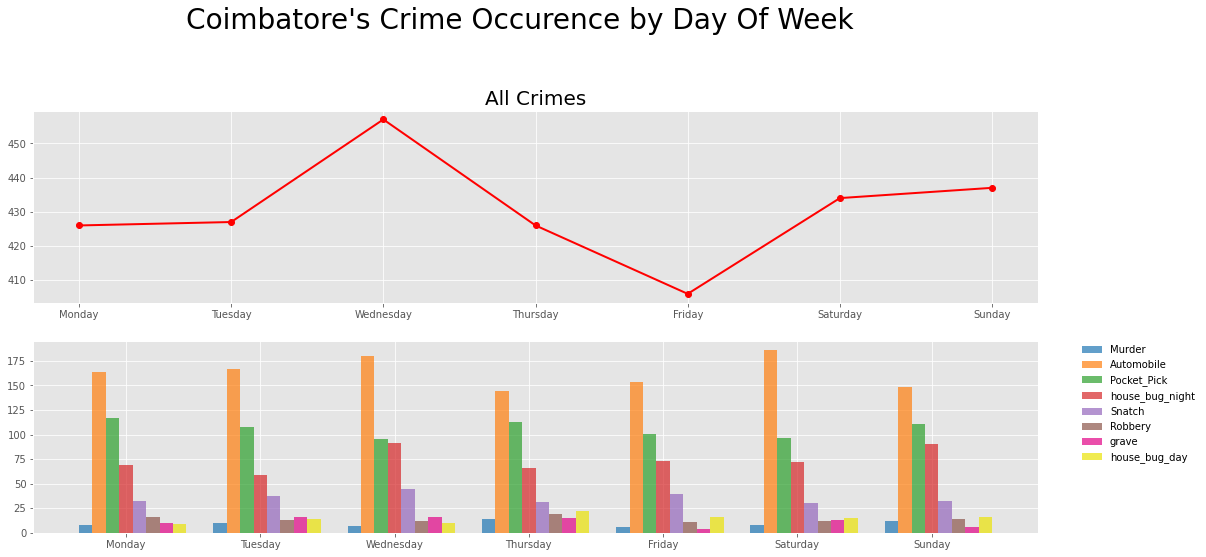

In [ ]:
pylab.rcParams['figure.figsize'] = (18, 12)

plt.style.use('ggplot')

daysOfWeekIdx = df.groupby('DayOfWeek').size().keys()
daysOfWeekLit = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
occursByWeek = df.groupby('DayOfWeek').size()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=6)
ax1.plot(daysOfWeekLit, occursByWeek, 'ro-', linewidth=2)
ax1.set_xticklabels(daysOfWeekLit)
ax1.set_title ('All Crimes', fontsize=20)
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Bar plot
y = np.empty([8,7])
h = [None]*8
width = 0.1


y[0] = Murder.groupby('DayOfWeek').size()
y[1] = Automobile.groupby('DayOfWeek').size()
y[2] = Pocket_Pick.groupby('DayOfWeek').size()
y[3] = house_bug_night.groupby('DayOfWeek').size()
y[4] = Snatch.groupby('DayOfWeek').size()
y[5] = Robbery.groupby('DayOfWeek').size()
y[6] = grave.groupby('DayOfWeek').size()
y[7] = house_bug_day.groupby('DayOfWeek').size()

ax2 = plt.subplot2grid((3,3), (1,0), colspan=6)

color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b','#e20386','#ebe306']

for i in range(0,8):
    h[i] = ax2.bar(daysOfWeekIdx + i*width, y[i], width, color=color_sequence[i], alpha = 0.7)

ax2.set_xticks(daysOfWeekIdx + 3*width)
ax2.set_xticklabels(daysOfWeekLit)
# ensure that ticks are only at the bottom and left parts of the plot
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()

ax2.legend((item[0] for item in h), 
           ('Murder', 'Automobile', 'Pocket_Pick', 'house_bug_night', 'Snatch', 'Robbery', 'grave', 'house_bug_day'), 
           bbox_to_anchor=(1.04,1), loc=2, borderaxespad=0, frameon=False)

pylab.gcf().text(0.5, 1.00, 
            "Coimbatore's Crime Occurence by Day Of Week",
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)

plt.show()

Wednesday is the most probable day for crime, so every one need to vigilant.

my intial hypothesis for the most probabale day for crime was friday before plotting because of weekend 

### Monthly analyisis

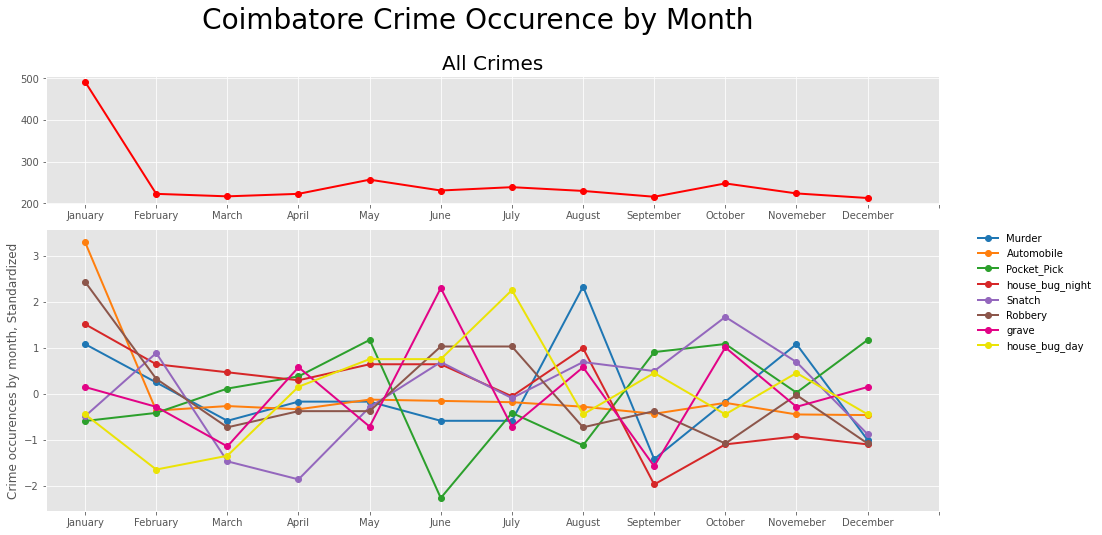

In [ ]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

monthsIdx = df.groupby('Month').size().keys() -1
monthsLit = ['January', 'February', 
             'March', 'April', 'May', 
             'June', 'July','August', 
             'September', 'October', 'Novemeber', 'December']
occursByMonth = df.groupby('Month').size()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot( monthsIdx, occursByMonth, 'ro-', linewidth=2)

ax1.set_title ('All Crimes', fontsize=20)

#start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(0, 13, 1))
ax1.set_xticklabels(monthsLit)
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Linear normalized plot for 6 top crimes
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2)

h = [None]*8
y = np.empty([8,12])
y[0] = Murder.groupby('Month').size()
y[1] = Automobile.groupby('Month').size()
y[2] = Pocket_Pick.groupby('Month').size()
y[3] = house_bug_night.groupby('Month').size()
y[4] = Snatch.groupby('Month').size()
y[5] = Robbery.groupby('Month').size()
y[6] = grave.groupby('Month').size()
y[7] = house_bug_day.groupby('Month').size()

crimes = ['Murder', 'Automobile', 'Pocket_Pick', 'house_bug_night', 'Snatch', 'Robbery', 'grave', 'house_bug_day']
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b','#e20386','#ebe306']

for i in range(0,8):
    y[i]= (y[i]-np.mean(y[i]))/np.std(y[i])
    #y[i]= (y[i]-min(y[i]))/(max(y[i])-min(y[i]))  # normalization
    h[i] = ax2.plot( y[i],'o-', color=color_sequence[i], lw=2)

ax2.set_ylabel("Crime occurences by month, Standardized")

ax2.xaxis.set_ticks(np.arange(0,13, 1))
ax2.set_xticklabels(monthsLit)

ax2.legend((item[0] for item in h), 
           crimes, 
           bbox_to_anchor=(1.04,1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'Coimbatore Crime Occurence by Month',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)
plt.show()

January is showing the highest crime.


Even Standardized value for each crime lies between normal range, only one outlier able to detect

### Yearly analyisis

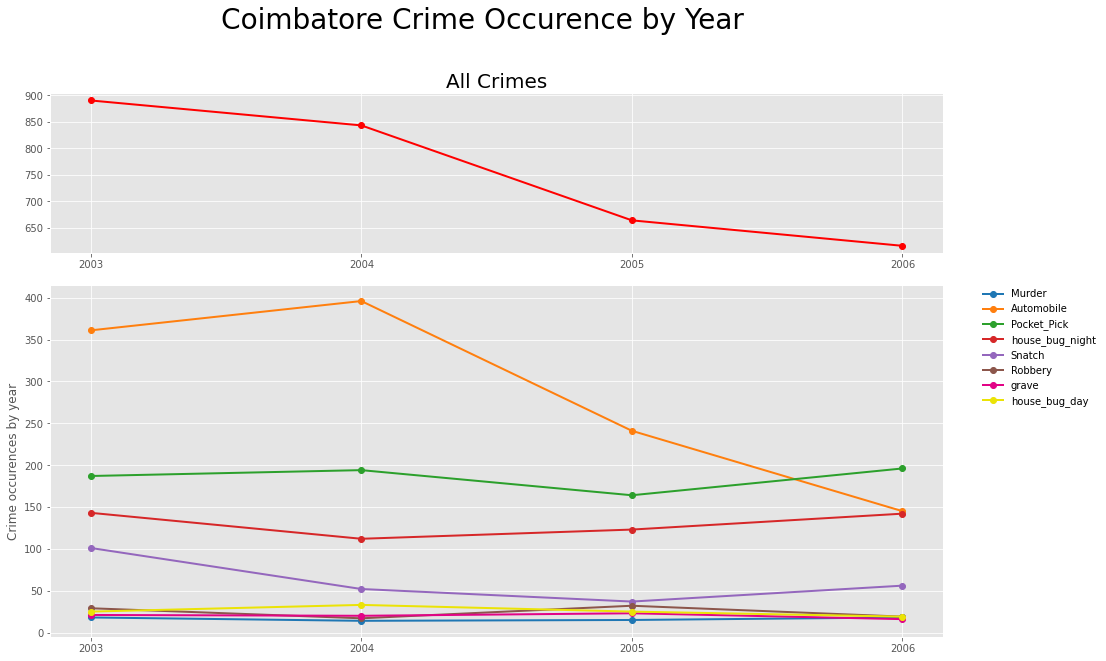

In [ ]:
pylab.rcParams['figure.figsize'] = (16.0, 10.0)

years = df.groupby('Year').size().keys()
occursByYear = df.groupby('Year').size()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(years, occursByYear, 'ro-', linewidth=2)

ax1.set_title ('All Crimes', fontsize=20)

#start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(years)
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Linear normalized plot for 6 top crimes
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2)

crimes = ['Murder', 'Automobile', 'Pocket_Pick', 'house_bug_night', 'Snatch', 'Robbery', 'grave', 'house_bug_day']
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b','#e20386','#ebe306']

h = [None]*8
y = np.empty([8,4])
y[0] = Murder.groupby('Year').size()
y[1] = Automobile.groupby('Year').size()
y[2] = Pocket_Pick.groupby('Year').size()
y[3] = house_bug_night.groupby('Year').size()
y[4] = Snatch.groupby('Year').size()
y[5] = Robbery.groupby('Year').size()
y[6] = grave.groupby('Year').size()
y[7] = house_bug_day.groupby('Year').size()
for i in range(0,8):
    h[i] = ax2.plot(years, y[i],'o-', color=color_sequence[i], lw=2)

ax2.set_ylabel("Crime occurences by year")

#start, end = ax2.get_xlim()  
ax2.xaxis.set_ticks(years)

ax2.legend((item[0] for item in h), 
           crimes, 
           bbox_to_anchor=(1.04,1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'Coimbatore Crime Occurence by Year',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)
plt.show()


There is a decline in every crime when we look on the pespective of yearly but need to bring down more. A city should always be developed, no one will invest money over a city were the crime is very high so we need to reduce the crime drasticaly


### Crime trend by month and year

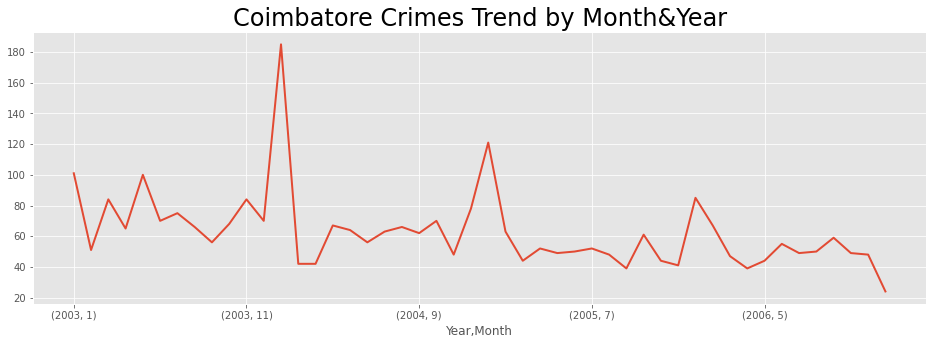

In [ ]:
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
yearMonth = df.groupby(['Year','Month']).size()
ax = yearMonth.plot(lw=2)
plt.title('Coimbatore Crimes Trend by Month&Year', fontsize=24)
plt.show()

2004 january is showing a huge spike in crime